<a href="https://colab.research.google.com/github/bindhu-hima-321/Optimization-of-Machine-Downtime/blob/main/Machine_Downtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1:**Importing Libraries

In [ ]:
# Commonly used libraries
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns        # For statistical data visualization

# Optional libraries depending on your needs
import scipy.stats as stats  # For statistical analysis
import sklearn               # For machine learning
from google.colab import files
uploaded = files.upload()

Saving Machine Downtime (3).csv to Machine Downtime (3) (2).csv


**Step2:** Reading Dataset

In [ ]:
df = pd.read_csv("/content/Machine Downtime (3).csv")
print(df.head())

         Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure  \
0  2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1               71.04   
1  2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1              125.33   
2  2021-12-31  Makino-L3-Unit1-2015     Shopfloor-L3               71.12   
3  2022-05-31  Makino-L2-Unit1-2015     Shopfloor-L2              139.34   
4  2022-03-31  Makino-L1-Unit1-2013     Shopfloor-L1               60.51   

   Coolant_Pressure  Air_System_Pressure  Coolant_Temperature  \
0          6.933725             6.284965                 25.6   
1          4.936892             6.196733                 35.3   
2          6.839413             6.655448                 13.1   
3          4.574382             6.560394                 24.4   
4          6.893182             6.141238                  4.1   

   Hydraulic_Oil_Temperature  Spindle_Bearing_Temperature  Spindle_Vibration  \
0                       46.0                         33.4              1

**Step3:** Analyzing the data

**shape of the dataset**

In [ ]:
# shape of the data
df.shape

(2500, 16)

**Size of the dataset**

In [ ]:
# Returns size of dataframe
df.size

40000

**Information of data**

In [ ]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure           2490 non-null   float64
 4   Coolant_Pressure             2481 non-null   float64
 5   Air_System_Pressure          2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed                2494 non-null   float64
 12  Voltage                      2494 non-null   float64
 13  Torque            

**Description of data**

In [ ]:
# describing the data
df.describe()

Hydraulic_Pressure  Coolant_Pressure  Air_System_Pressure  \
count         2490.000000       2481.000000          2483.000000   
mean           101.409084          4.947058             6.499275   
std             30.289301          0.997357             0.407279   
min            -14.326454          0.325000             5.063480   
25%             76.355000          4.462464             6.217987   
50%             96.763486          4.939960             6.505191   
75%            126.415727          5.518401             6.780550   
max            191.000000         11.350000             7.973992   

       Coolant_Temperature  Hydraulic_Oil_Temperature  \
count          2488.000000                2484.000000   
mean             18.559887                  47.618317   
std               8.554480                   3.768674   
min               4.100000                  35.200000   
25%              10.400000                  45.100000   
50%              21.200000                  47.700000   
75%              25.600000                  50.100000   
max              98.200000                  61.400000   

       Spindle_Bearing_Temperature  Spindle_Vibration  Tool_Vibration  \
count                  2493.000000        2489.000000     2489.000000   
mean                     35.063698           1.009334       25.411975   
std                       3.764823           0.342898        6.437142   
min                      22.600000          -0.461000        2.161000   
25%                      32.500000           0.777000       21.089000   
50%                      35.100000           1.008000       25.455000   
75%                      37.600000           1.236000       29.790000   
max                      49.500000           2.000000       45.726000   

       Spindle_Speed      Voltage       Torque      Cutting  
count    2494.000000  2494.000000  2479.000000  2493.000000  
mean    20274.792302   348.996792    25.234968     2.782551  
std      3852.660056    45.376024     6.138564     0.616688  
min         0.000000   202.000000     0.000000     1.800000  
25%     17919.000000   319.000000    21.666115     2.250000  
50%     20137.500000   349.000000    24.647736     2.780000  
75%     22501.750000   380.000000    30.514008     3.270000  
max     27957.000000   479.000000    55.552400     3.930000

**Checking Columns**

In [ ]:
#column to list
df.columns.tolist()

['Date',
 'Machine_ID',
 'Assembly_Line_No',
 'Hydraulic_Pressure',
 'Coolant_Pressure',
 'Air_System_Pressure',
 'Coolant_Temperature',
 'Hydraulic_Oil_Temperature',
 'Spindle_Bearing_Temperature',
 'Spindle_Vibration',
 'Tool_Vibration',
 'Spindle_Speed',
 'Voltage',
 'Torque',
 'Cutting',
 'Downtime']

**Checking Missing Values**

In [ ]:
# check for missing values:
df.isnull().sum()

Date                            0
Machine_ID                      0
Assembly_Line_No                0
Hydraulic_Pressure             10
Coolant_Pressure               19
Air_System_Pressure            17
Coolant_Temperature            12
Hydraulic_Oil_Temperature      16
Spindle_Bearing_Temperature     7
Spindle_Vibration              11
Tool_Vibration                 11
Spindle_Speed                   6
Voltage                         6
Torque                         21
Cutting                         7
Downtime                        0
dtype: int64

**Checking for the duplicate values**

In [ ]:
#checking duplicate values
df.nunique()

Date                            164
Machine_ID                        3
Assembly_Line_No                  3
Hydraulic_Pressure             1977
Coolant_Pressure               1628
Air_System_Pressure            2472
Coolant_Temperature             275
Hydraulic_Oil_Temperature       209
Spindle_Bearing_Temperature     204
Spindle_Vibration              1144
Tool_Vibration                 2350
Spindle_Speed                  1180
Voltage                         238
Torque                         1327
Cutting                         170
Downtime                          2
dtype: int64

In [ ]:
# Display the first few rows of the DataFrame
df.head()

Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure  \
0  2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1               71.04   
1  2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1              125.33   
2  2021-12-31  Makino-L3-Unit1-2015     Shopfloor-L3               71.12   
3  2022-05-31  Makino-L2-Unit1-2015     Shopfloor-L2              139.34   
4  2022-03-31  Makino-L1-Unit1-2013     Shopfloor-L1               60.51   

   Coolant_Pressure  Air_System_Pressure  Coolant_Temperature  \
0          6.933725             6.284965                 25.6   
1          4.936892             6.196733                 35.3   
2          6.839413             6.655448                 13.1   
3          4.574382             6.560394                 24.4   
4          6.893182             6.141238                  4.1   

   Hydraulic_Oil_Temperature  Spindle_Bearing_Temperature  Spindle_Vibration  \
0                       46.0                         33.4              1.291   
1                       47.4                         34.6              1.382   
2                       40.7                         33.0              1.319   
3                       44.2                         40.6              0.618   
4                       47.3                         31.4              0.983   

   Tool_Vibration  Spindle_Speed  Voltage     Torque  Cutting         Downtime  
0          26.492        25892.0    335.0  24.055326     3.58  Machine_Failure  
1          25.274        19856.0    368.0  14.202890     2.68  Machine_Failure  
2          30.608        19851.0    325.0  24.049267     3.55  Machine_Failure  
3          30.791        18461.0    360.0  25.860029     3.55  Machine_Failure  
4          25.516        26526.0    354.0  25.515874     3.55  Machine_Failure

**Step4:** DATA PREPARATION

(a)EDA Analysis:

*1.Measures of Central Tendancy* - Mean,Median,Mode

In [ ]:
# Calculating 'mean' for each column
# Assuming 'df' is your DataFrame
columns_to_calculate_mean = [
    'Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
    'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration',
    'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque', 'Cutting'
]

# Calculate the mean for the specified columns
mean_values = df[columns_to_calculate_mean].mean()

# Print the mean values
print(mean_values)


Hydraulic_Pressure               101.409084
Coolant_Pressure                   4.947058
Air_System_Pressure                6.499275
Coolant_Temperature               18.559887
Hydraulic_Oil_Temperature         47.618317
Spindle_Bearing_Temperature       35.063698
Spindle_Vibration                  1.009334
Tool_Vibration                    25.411975
Spindle_Speed                  20274.792302
Voltage                          348.996792
Torque                            25.234968
Cutting                            2.782551
dtype: float64


In [ ]:
# Calculating 'meadian' for each column
# Assuming 'df' is your DataFrame
columns_to_calculate_median = [
    'Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
    'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration',
    'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque', 'Cutting'
]

# Calculate the median for the specified columns
median_values = df[columns_to_calculate_median].median()

# Print the median values
print(median_values)

Hydraulic_Pressure                96.763486
Coolant_Pressure                   4.939960
Air_System_Pressure                6.505191
Coolant_Temperature               21.200000
Hydraulic_Oil_Temperature         47.700000
Spindle_Bearing_Temperature       35.100000
Spindle_Vibration                  1.008000
Tool_Vibration                    25.455000
Spindle_Speed                  20137.500000
Voltage                          349.000000
Torque                            24.647736
Cutting                            2.780000
dtype: float64


In [ ]:
#Calculating the 'mode' for each column
# Assuming 'df' is your DataFrame
columns_to_calculate_mode = [
    'Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
    'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration',
    'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque', 'Cutting'
]

# Calculate the mode for the specified columns
mode_values = df[columns_to_calculate_mode].mode()

# Print the mode values
print(mode_values)


    Hydraulic_Pressure  Coolant_Pressure  Air_System_Pressure  \
0            88.279134          4.566854             5.628717   
1            89.458747          4.842521             5.928643   
2            90.458747          5.567857             5.955235   
3                  NaN          5.918357             6.011483   
4                  NaN          6.560332             6.167549   
5                  NaN          6.839413             6.430073   
6                  NaN          6.863944             6.668245   
7                  NaN          6.893182             6.753560   
8                  NaN               NaN             6.836188   
9                  NaN               NaN             6.875058   
10                 NaN               NaN             6.940606   

    Coolant_Temperature  Hydraulic_Oil_Temperature  \
0                  26.4                       47.5   
1                   NaN                       48.0   
2                   NaN                       50.0   
3  

2.Measures of Dispersion - Varience,Standard Deviation,Range

In [ ]:
# Calculating 'varience' for each column
# Assuming 'df' is your DataFrame
columns_to_calculate_variance = [
    'Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
    'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration',
    'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque', 'Cutting'
]

# Calculate the variance for the specified columns
variance_values = df[columns_to_calculate_variance].var()

# Print the variance values
print(variance_values)

Hydraulic_Pressure             9.174417e+02
Coolant_Pressure               9.947213e-01
Air_System_Pressure            1.658765e-01
Coolant_Temperature            7.317912e+01
Hydraulic_Oil_Temperature      1.420291e+01
Spindle_Bearing_Temperature    1.417389e+01
Spindle_Vibration              1.175791e-01
Tool_Vibration                 4.143679e+01
Spindle_Speed                  1.484299e+07
Voltage                        2.058984e+03
Torque                         3.768196e+01
Cutting                        3.803044e-01
dtype: float64


In [ ]:
# Calculating 'Standard deviation' for each column
# Assuming 'df' is your DataFrame
columns_to_calculate_std = [
    'Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
    'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration',
    'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque', 'Cutting'
]

# Calculate the standard deviation for the specified columns
std_values = df[columns_to_calculate_std].std()

# Print the standard deviation values
print(std_values)

Hydraulic_Pressure               30.289301
Coolant_Pressure                  0.997357
Air_System_Pressure               0.407279
Coolant_Temperature               8.554480
Hydraulic_Oil_Temperature         3.768674
Spindle_Bearing_Temperature       3.764823
Spindle_Vibration                 0.342898
Tool_Vibration                    6.437142
Spindle_Speed                  3852.660056
Voltage                          45.376024
Torque                            6.138564
Cutting                           0.616688
dtype: float64


In [ ]:
# Calculating 'Range' for each column
# Assuming 'df' is your DataFrame
columns_to_calculate_range = [
    'Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
    'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration',
    'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque', 'Cutting'
]

# Calculate the range for the specified columns
range_values = df[columns_to_calculate_range].max() - df[columns_to_calculate_range].min()

# Print the range values
print(range_values)

Hydraulic_Pressure               205.326454
Coolant_Pressure                  11.025000
Air_System_Pressure                2.910511
Coolant_Temperature               94.100000
Hydraulic_Oil_Temperature         26.200000
Spindle_Bearing_Temperature       26.900000
Spindle_Vibration                  2.461000
Tool_Vibration                    43.565000
Spindle_Speed                  27957.000000
Voltage                          277.000000
Torque                            55.552400
Cutting                            2.130000
dtype: float64


3.Skweness - positive,negative,=0

In [ ]:
# Calculating 'Skweness' for each column
# Assuming 'df' is your DataFrame
columns_to_calculate_skewness = [
    'Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
    'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration',
    'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque', 'Cutting'
]

# Calculate the skewness for the specified columns
skewness_values = df[columns_to_calculate_skewness].skew()

# Categorize skewness values
def categorize_skewness(skewness):
    if skewness > 0:
        return 'Positive Skewness'
    elif skewness < 0:
        return 'Negative Skewness'
    else:
        return 'Zero Skewness'

# Apply categorization
skewness_categories = skewness_values.apply(categorize_skewness)

# Print skewness values and their categories
for column, skewness, category in zip(skewness_values.index, skewness_values, skewness_categories):
    print(f"Column: {column}, Skewness: {skewness:.2f}, Category: {category}")


Column: Hydraulic_Pressure, Skewness: 0.20, Category: Positive Skewness
Column: Coolant_Pressure, Skewness: 0.15, Category: Positive Skewness
Column: Air_System_Pressure, Skewness: -0.05, Category: Negative Skewness
Column: Coolant_Temperature, Skewness: 0.11, Category: Positive Skewness
Column: Hydraulic_Oil_Temperature, Skewness: -0.00, Category: Negative Skewness
Column: Spindle_Bearing_Temperature, Skewness: -0.04, Category: Negative Skewness
Column: Spindle_Vibration, Skewness: 0.00, Category: Positive Skewness
Column: Tool_Vibration, Skewness: -0.06, Category: Negative Skewness
Column: Spindle_Speed, Skewness: -0.17, Category: Negative Skewness
Column: Voltage, Skewness: -0.03, Category: Negative Skewness
Column: Torque, Skewness: 0.03, Category: Positive Skewness
Column: Cutting, Skewness: 0.11, Category: Positive Skewness


4.Kurtosis - Positive,Negative,=3

In [ ]:
# Calculating 'Kurtosis' for each column

# Assuming 'df' is your DataFrame
columns_to_calculate_kurtosis = [
    'Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
    'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration',
    'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque', 'Cutting'
]

# Calculate the kurtosis for the specified columns
kurtosis_values = df[columns_to_calculate_kurtosis].kurtosis()

# Categorize kurtosis values
def categorize_kurtosis(kurtosis):
    if kurtosis > 3:
        return 'Positive Kurtosis (Leptokurtic)'
    elif kurtosis < 3:
        return 'Negative Kurtosis (Platykurtic)'
    else:
        return 'Normal Kurtosis (Mesokurtic)'

# Apply categorization
kurtosis_categories = kurtosis_values.apply(categorize_kurtosis)

# Print kurtosis values and their categories
for column, kurtosis, category in zip(kurtosis_values.index, kurtosis_values, kurtosis_categories):
    print(f"Column: {column}, Kurtosis: {kurtosis:.2f}, Category: {category}")


Column: Hydraulic_Pressure, Kurtosis: -0.92, Category: Negative Kurtosis (Platykurtic)
Column: Coolant_Pressure, Kurtosis: 1.17, Category: Negative Kurtosis (Platykurtic)
Column: Air_System_Pressure, Kurtosis: -0.00, Category: Negative Kurtosis (Platykurtic)
Column: Coolant_Temperature, Kurtosis: 1.56, Category: Negative Kurtosis (Platykurtic)
Column: Hydraulic_Oil_Temperature, Kurtosis: 0.04, Category: Negative Kurtosis (Platykurtic)
Column: Spindle_Bearing_Temperature, Kurtosis: -0.04, Category: Negative Kurtosis (Platykurtic)
Column: Spindle_Vibration, Kurtosis: -0.02, Category: Negative Kurtosis (Platykurtic)
Column: Tool_Vibration, Kurtosis: 0.01, Category: Negative Kurtosis (Platykurtic)
Column: Spindle_Speed, Kurtosis: 1.34, Category: Negative Kurtosis (Platykurtic)
Column: Voltage, Kurtosis: -0.09, Category: Negative Kurtosis (Platykurtic)
Column: Torque, Kurtosis: -0.47, Category: Negative Kurtosis (Platykurtic)
Column: Cutting, Kurtosis: -1.09, Category: Negative Kurtosis (Pl

(b)Data Preprocessing

**1.Data Cleansing**

i)Handling Duplicates


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Length: 2500, dtype: bool

In [ ]:
 # Identify duplicate rows
duplicates = df[df.duplicated()]


In [ ]:
# Display duplicate rows
print("Duplicate rows:")
print(duplicates.head())

Duplicate rows:
Empty DataFrame
Columns: [Date, Machine_ID, Assembly_Line_No, Hydraulic_Pressure, Coolant_Pressure, Air_System_Pressure, Coolant_Temperature, Hydraulic_Oil_Temperature, Spindle_Bearing_Temperature, Spindle_Vibration, Tool_Vibration, Spindle_Speed, Voltage, Torque, Cutting, Downtime]
Index: []


ii)Outliers

In [ ]:
# Convert columns to numeric, errors='coerce' will turn non-numeric values to NaN
numeric_cols = [
    'Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure',
    'Coolant_Temperature', 'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature',
    'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque',
    'Cutting'
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate outliers using IQR
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[f'{column}_Outlier'] = np.where(
        (df[column] < lower_bound) | (df[column] > upper_bound),
        'Outlier',
        'Not Outlier'
    )

# Apply the function to each column
for col in numeric_cols:
    calculate_outliers(df, col)

# Save the result to a new CSV file (optional)
df.to_csv('machine_downtime_with_outliers.csv', index=False)

# Display the DataFrame with outliers
print(df.head())


         Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure  \
0  2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1               71.04   
1  2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1              125.33   
2  2021-12-31  Makino-L3-Unit1-2015     Shopfloor-L3               71.12   
3  2022-05-31  Makino-L2-Unit1-2015     Shopfloor-L2              139.34   
4  2022-03-31  Makino-L1-Unit1-2013     Shopfloor-L1               60.51   

   Coolant_Pressure  Air_System_Pressure  Coolant_Temperature  \
0          6.933725             6.284965                 25.6   
1          4.936892             6.196733                 35.3   
2          6.839413             6.655448                 13.1   
3          4.574382             6.560394                 24.4   
4          6.893182             6.141238                  4.1   

   Hydraulic_Oil_Temperature  Spindle_Bearing_Temperature  Spindle_Vibration  \
0                       46.0                         33.4              1

**Applying outlier detection**

In [ ]:
def calculate_outliers(df, column):
    data = df[column].dropna()
    if not data.empty:
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[f'{column}_Outlier'] = np.where(
            (df[column] < lower_bound) | (df[column] > upper_bound),
            'Outlier',
            'Not Outlier'
        )
    else:
        df[f'{column}_Outlier'] = 'No Data'


In [ ]:
for col in numeric_cols:
    calculate_outliers(df, col)


In [ ]:
df.to_csv('your_dataset_with_outliers.csv', index=False)
print(df.head())


         Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure  \
0  2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1               71.04   
1  2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1              125.33   
2  2021-12-31  Makino-L3-Unit1-2015     Shopfloor-L3               71.12   
3  2022-05-31  Makino-L2-Unit1-2015     Shopfloor-L2              139.34   
4  2022-03-31  Makino-L1-Unit1-2013     Shopfloor-L1               60.51   

   Coolant_Pressure  Air_System_Pressure  Coolant_Temperature  \
0          6.933725             6.284965                 25.6   
1          4.936892             6.196733                 35.3   
2          6.839413             6.655448                 13.1   
3          4.574382             6.560394                 24.4   
4          6.893182             6.141238                  4.1   

   Hydraulic_Oil_Temperature  Spindle_Bearing_Temperature  Spindle_Vibration  \
0                       46.0                         33.4              1

**Showing outliers**

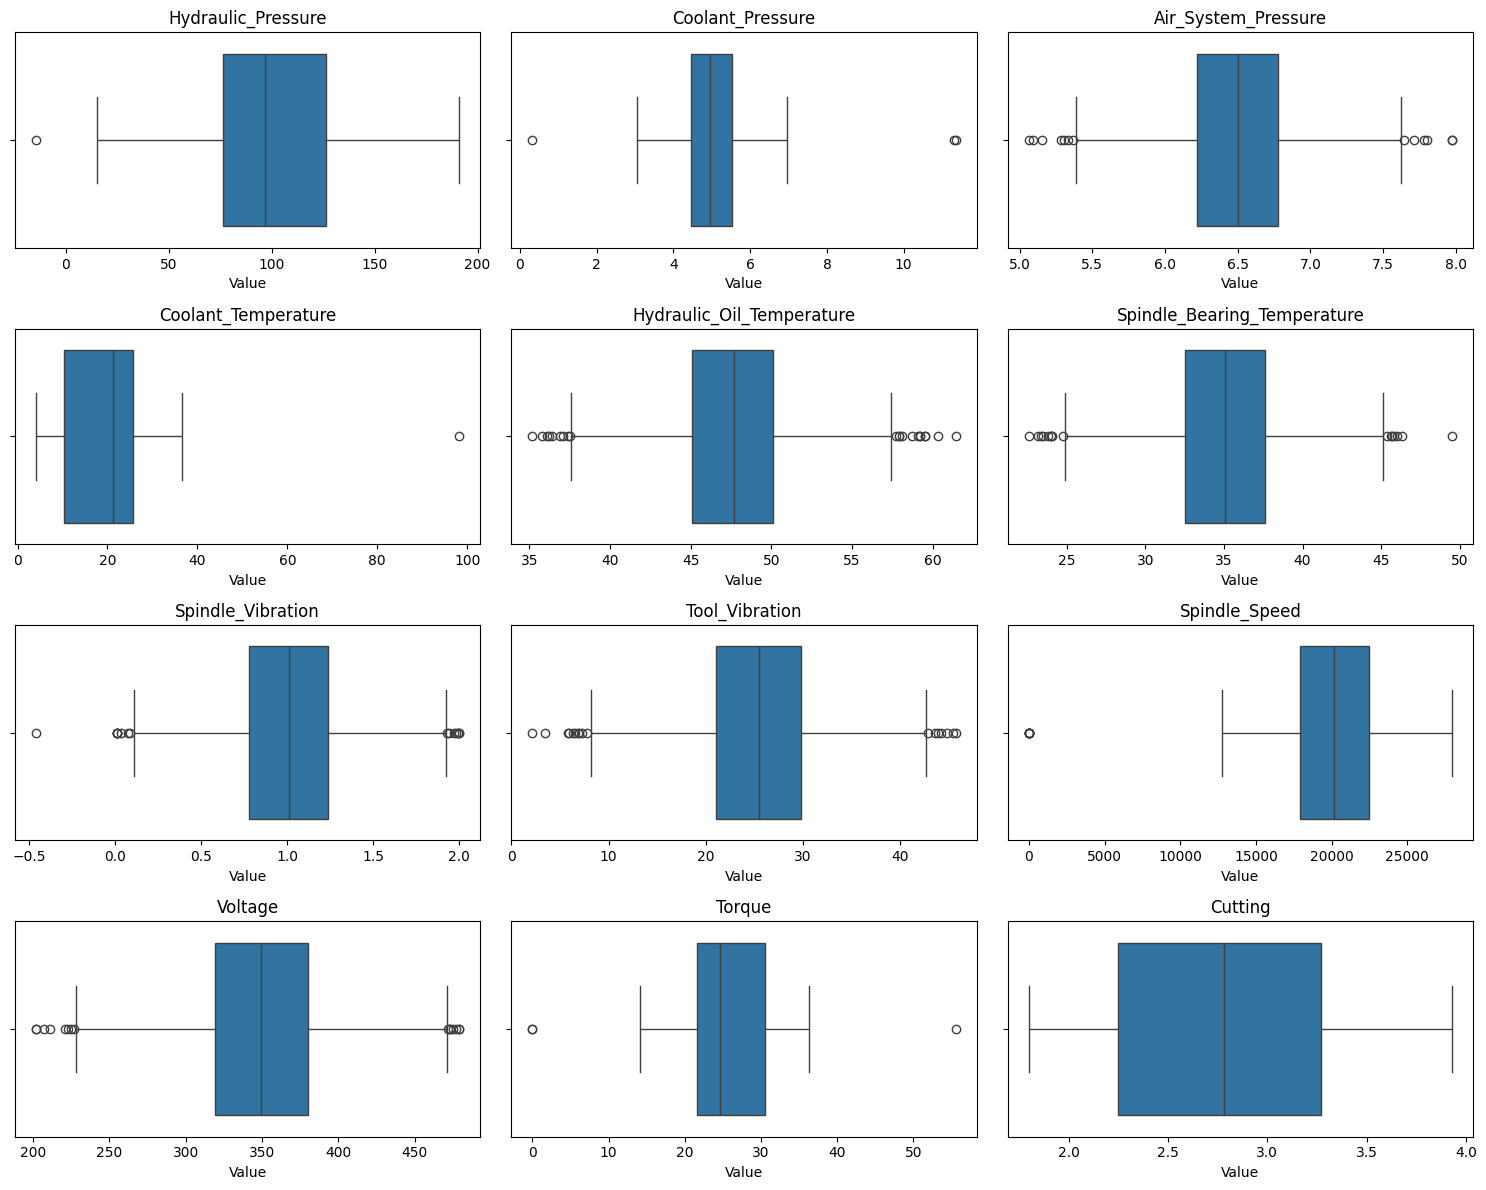

In [ ]:
# Sample DataFrame df
columns_to_plot = [
    'Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
    'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration',
    'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque', 'Cutting'
]

# Plotting box plots for each column
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  # Adjust the number of rows and columns based on your dataset
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()


iii)Handling Missing Values

a)Indentifying missing values


In [ ]:
# Check for missing values
print(df.isnull().sum())

Date                                    0
Machine_ID                              0
Assembly_Line_No                        0
Hydraulic_Pressure                     10
Coolant_Pressure                       19
Air_System_Pressure                    17
Coolant_Temperature                    12
Hydraulic_Oil_Temperature              16
Spindle_Bearing_Temperature             7
Spindle_Vibration                      11
Tool_Vibration                         11
Spindle_Speed                           6
Voltage                                 6
Torque                                 21
Cutting                                 7
Downtime                                0
Hydraulic_Pressure_Outlier              0
Coolant_Pressure_Outlier                0
Air_System_Pressure_Outlier             0
Coolant_Temperature_Outlier             0
Hydraulic_Oil_Temperature_Outlier       0
Spindle_Bearing_Temperature_Outlier     0
Spindle_Vibration_Outlier               0
Tool_Vibration_Outlier            

b)Removing missing values

In [ ]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Drop columns with missing values
df_cleaned = df.dropna(axis=1)

c)Filling missing values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Sample DataFrame with all column types
df = pd.DataFrame({
    'Date': ['2024-01-01', None, '2024-01-03', None, '2024-01-05'],
    'Machine_ID': [1, 2, 3, None, 5],
    'Assembly_Line_No': [None, 1, 2, 3, None],
    'Hydraulic_Pressure': [100, None, 120, None, 110],
    'Coolant_Pressure': [30, 25, None, 28, None],
    'Air_System_Pressure': [None, 10, 15, None, 12],
    'Coolant_Temperature': [75, None, 80, 70, None],
    'Hydraulic_Oil_Temperature': [None, 60, 65, 62, None],
    'Spindle_Bearing_Temperature': [None, 85, 90, None, 88],
    'Spindle_Vibration': [0.1, None, 0.2, 0.3, None],
    'Tool_Vibration': [None, 0.15, 0.20, None, 0.18],
    'Spindle_Speed': [1500, None, 1600, None, 1550],
    'Voltage': [220, None, 230, 225, None],
    'Torque': [None, 50, 55, None, 52],
    'Cutting': ['Yes', 'No', None, 'Yes', 'No'],
    'Downtime': ['Machine_Failure', None, 'No_Machine_Failure', 'Machine_Failure', None]
})

# Convert None to NaN
df = df.replace({None: np.nan})

# Imputation for numerical columns
num_cols = [
    'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure', 'Coolant_Pressure',
    'Air_System_Pressure', 'Coolant_Temperature', 'Hydraulic_Oil_Temperature',
    'Spindle_Bearing_Temperature', 'Spindle_Vibration', 'Tool_Vibration',
    'Spindle_Speed', 'Voltage', 'Torque'
]
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Imputation for categorical columns
cat_cols = ['Cutting', 'Downtime']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Imputation for date columns
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].fillna(method='ffill')

print(df)


        Date  Machine_ID  Assembly_Line_No  Hydraulic_Pressure  \
0 2024-01-01        1.00               2.0               100.0   
1 2024-01-01        2.00               1.0               110.0   
2 2024-01-03        3.00               2.0               120.0   
3 2024-01-03        2.75               3.0               110.0   
4 2024-01-05        5.00               2.0               110.0   

   Coolant_Pressure  Air_System_Pressure  Coolant_Temperature  \
0         30.000000            12.333333                 75.0   
1         25.000000            10.000000                 75.0   
2         27.666667            15.000000                 80.0   
3         28.000000            12.333333                 70.0   
4         27.666667            12.000000                 75.0   

   Hydraulic_Oil_Temperature  Spindle_Bearing_Temperature  Spindle_Vibration  \
0                  62.333333                    87.666667                0.1   
1                  60.000000                    85.0

<ipython-input-123-65aa85727130>:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')


**2.Data Transformation:**

i)Normalization/Standardization :

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Columns to normalize and standardize (excluding non-numeric columns like 'Date', 'Machine_ID', 'Assembly_Line_No')
columns_to_transform = [
    'Hydraulic_Pressure', 'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
    'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration',
    'Tool_Vibration', 'Spindle_Speed', 'Voltage', 'Torque', 'Cutting', 'Downtime'
]

# Select only numeric columns
numeric_columns = df[columns_to_transform].select_dtypes(include=[float, int]).columns

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Normalization (Min-Max Scaling): Transforms data to a range [0, 1]
df_normalized = df.copy()
df_normalized[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

# Standardization (Z-Score Scaling): Transforms data to have a mean of 0 and a standard deviation of 1
df_standardized = df.copy()
df_standardized[numeric_columns] = standard_scaler.fit_transform(df[numeric_columns])

# Display the transformed data
print("Normalized Data:")
print(df_normalized.head())

print("Standardized Data:")
print(df_standardized.head())


Normalized Data:
        Date  Machine_ID  Assembly_Line_No  Hydraulic_Pressure  \
0 2024-01-01        1.00               2.0                 0.0   
1 2024-01-01        2.00               1.0                 0.5   
2 2024-01-03        3.00               2.0                 1.0   
3 2024-01-03        2.75               3.0                 0.5   
4 2024-01-05        5.00               2.0                 0.5   

   Coolant_Pressure  Air_System_Pressure  Coolant_Temperature  \
0          1.000000             0.466667                  0.5   
1          0.000000             0.000000                  0.5   
2          0.533333             1.000000                  1.0   
3          0.600000             0.466667                  0.0   
4          0.533333             0.400000                  0.5   

   Hydraulic_Oil_Temperature  Spindle_Bearing_Temperature  Spindle_Vibration  \
0                   0.466667                     0.533333                0.0   
1                   0.000000       

ii)Encoding Categorical Variables

a.Label Encoding:

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
data = {
    'Downtime': ['Machine_Failure', 'No_Machine_Failure', 'Machine_Failure', 'No_Machine_Failure']
}

df = pd.DataFrame(data)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Downtime' column
df['Downtime_LabelEncoded'] = label_encoder.fit_transform(df['Downtime'])

print(df)


             Downtime  Downtime_LabelEncoded
0     Machine_Failure                      0
1  No_Machine_Failure                      1
2     Machine_Failure                      0
3  No_Machine_Failure                      1


b.One-Hot Encoding :

In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'Downtime': ['Machine_Failure', 'No_Machine_Failure', 'Machine_Failure', 'No_Machine_Failure']
}

df = pd.DataFrame(data)

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Downtime'])

print(df_encoded)

   Downtime_Machine_Failure  Downtime_No_Machine_Failure
0                      True                        False
1                     False                         True
2                      True                        False
3                     False                         True


c.Feature Engineering

In [ ]:
# Sample DataFrame (replace this with your actual data loading method)
df = pd.read_csv('/content/Machine Downtime (3).csv')

# Print column names to verify
print("Columns in the DataFrame:", df.columns)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract date-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

# Extract hour if 'Time' is available (optional)
# If you don't have 'Time', this line will just add a column with NaN
if 'Time' in df.columns:
    df['Hour'] = df['Date'].dt.hour
else:
    df['Hour'] = np.nan  # Ensure 'Hour' column is present but with NaN values

# Convert columns to numeric and handle missing values
df['Hydraulic_Pressure'] = pd.to_numeric(df['Hydraulic_Pressure'], errors='coerce')
df['Coolant_Temperature'] = pd.to_numeric(df['Coolant_Temperature'], errors='coerce')
df['Hydraulic_Pressure'] = df['Hydraulic_Pressure'].fillna(df['Hydraulic_Pressure'].mean())
df['Coolant_Temperature'] = df['Coolant_Temperature'].fillna(df['Coolant_Temperature'].mean())

# Binning continuous features
df['Hydraulic_Pressure_Bin'] = pd.cut(df['Hydraulic_Pressure'], bins=5, labels=False)
df['Coolant_Temperature_Bin'] = pd.cut(df['Coolant_Temperature'], bins=5, labels=False)

# Handle categorical feature (e.g., 'Cutting') by encoding it
df['Cutting_Encoded'] = df['Cutting'].astype('category').cat.codes

# Handle 'Downtime' column by encoding
df['Downtime_Encoded'] = df['Downtime'].map({'Machine_Failure': 1, 'No_Machine_Failure': 0})
df['Downtime_Encoded'] = df['Downtime_Encoded'].fillna(df['Downtime_Encoded'].mean())

# Feature Engineering for time of day (if 'Hour' is available)
if 'Hour' in df.columns and df['Hour'].notna().all():
    df['Hour_Sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
    df['Hour_Cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
else:
    # Handle cases where 'Hour' is NaN or not available
    df['Hour_Sin'] = np.nan
    df['Hour_Cos'] = np.nan

# Drop or retain the original features as needed
df = df.drop(columns=['Date'])  # Optionally drop the 'Date' column if not needed

print(df.head())


Columns in the DataFrame: Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure',
       'Coolant_Pressure', 'Air_System_Pressure', 'Coolant_Temperature',
       'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature',
       'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed', 'Voltage',
       'Torque', 'Cutting', 'Downtime'],
      dtype='object')
             Machine_ID Assembly_Line_No  Hydraulic_Pressure  \
0  Makino-L1-Unit1-2013     Shopfloor-L1               71.04   
1  Makino-L1-Unit1-2013     Shopfloor-L1              125.33   
2  Makino-L3-Unit1-2015     Shopfloor-L3               71.12   
3  Makino-L2-Unit1-2015     Shopfloor-L2              139.34   
4  Makino-L1-Unit1-2013     Shopfloor-L1               60.51   

   Coolant_Pressure  Air_System_Pressure  Coolant_Temperature  \
0          6.933725             6.284965                 25.6   
1          4.936892             6.196733                 35.3   
2          6.839413             6.655448      

**Step5:** Identify Key Metrics

1. **Focus on Downtime Analysis**

**Objective:** Your primary goal is to understand the patterns and conditions that lead to machine downtime, as recorded in the "Downtime" column.

**Questions to Explore:**
1.What are the most common conditions (e.
g., hydraulic pressure, temperature) during downtimes?

2.How does downtime vary across different machines or assembly lines?

3.Are there specific times (days, months, seasons) when downtime is more frequent?

**2.Analyzing the Distribution of Downtime:**

Frequency of Downtime Events

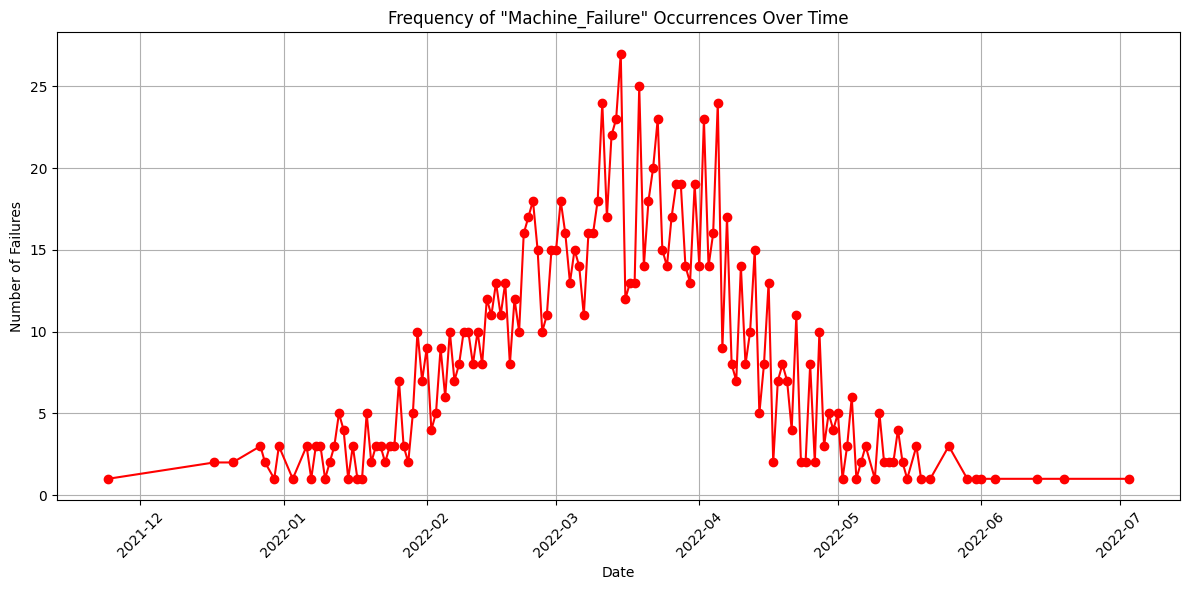

In [ ]:
# Sample DataFrame (replace this with your actual data loading method)
df = pd.read_csv('/content/Machine Downtime (3).csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the dataset for rows where Downtime equals 'Machine_Failure'
failure_data = df[df['Downtime'] == 'Machine_Failure']

# Count the number of failures per date
failures_per_date = failure_data.groupby('Date').size()

# Plotting the frequency of "Machine_Failure" occurrences over time using a line chart
plt.figure(figsize=(12, 6))
plt.plot(failures_per_date.index, failures_per_date.values, marker='o', linestyle='-', color='red')
plt.title('Frequency of "Machine_Failure" Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Failures')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

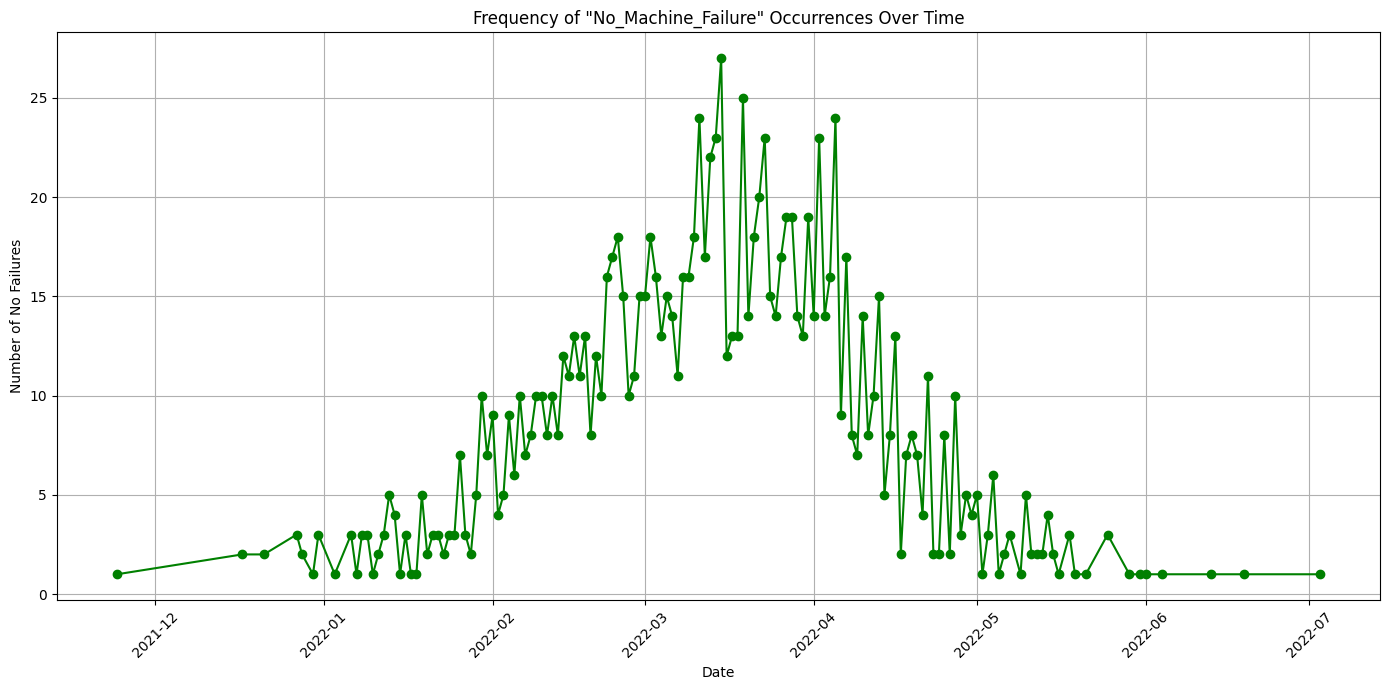

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the dataset for rows where Downtime equals 'No_Machine_Failure'
no_failure_data = df[df['Downtime'] == 'No_Machine_Failure']

# Count the number of failures per date
no_failures_per_date = no_failure_data.groupby('Date').size()

# Plotting the frequency of "No_Machine_Failure" occurrences over time using a line chart
plt.figure(figsize=(14, 7))
plt.plot(failures_per_date.index, failures_per_date.values, marker='o', linestyle='-', color='green')
plt.title('Frequency of "No_Machine_Failure" Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Number of No Failures')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**Step6:** Data Visualization

a)Preparing Data

In [ ]:
 # Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Handle 'Downtime' column (assuming it's categorical)
df['Downtime'] = df['Downtime'].astype('category')

b)Time series Analysis of Downtime over time

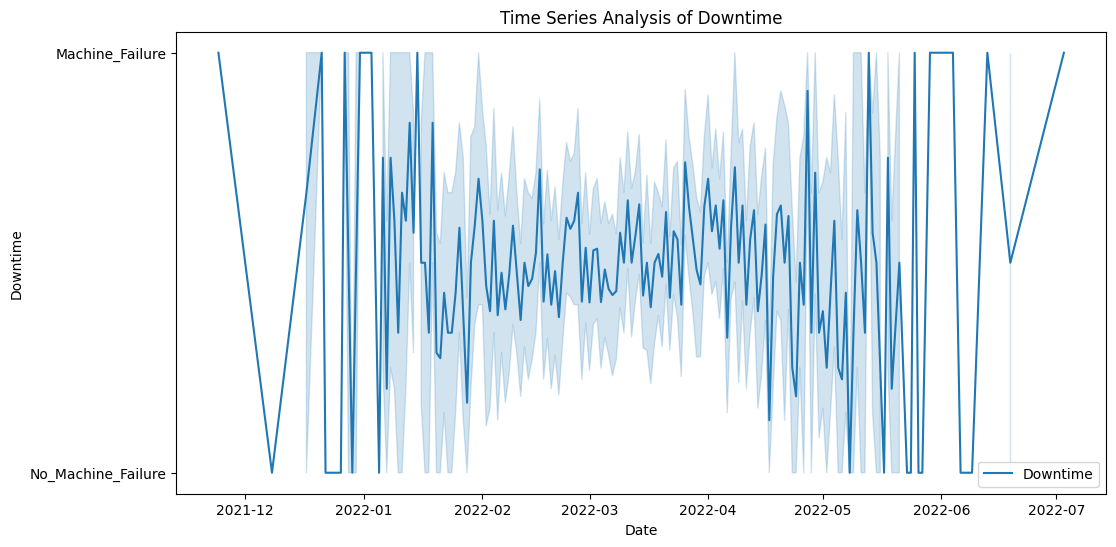

In [ ]:
# Line plot
# Set the Date Column as the Index
df.set_index('Date', inplace=True)
# Plot the Time Series
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Downtime',label='Downtime')  # Replace 'downtime' with your metric
plt.title('Time Series Analysis of Downtime')
plt.xlabel('Date')
plt.ylabel('Downtime')
plt.show()


c.Distribution of Downtime Events Across Machines

<ipython-input-133-2fb17f84002b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=machine_downtime_counts.index, y=machine_downtime_counts.values, palette='cubehelix')


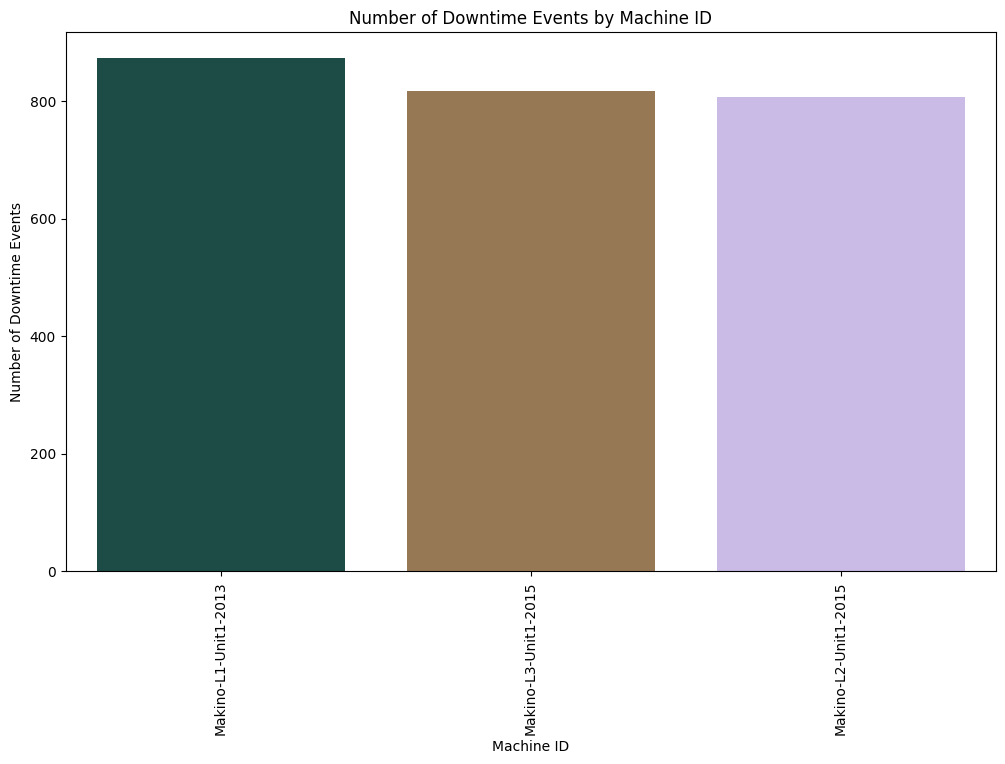

In [ ]:
# Visualization: Bar Chart of Downtime Events by Machine ID
plt.figure(figsize=(12, 7))
machine_downtime_counts = df['Machine_ID'].value_counts()
sns.barplot(x=machine_downtime_counts.index, y=machine_downtime_counts.values, palette='cubehelix')
plt.title('Number of Downtime Events by Machine ID')
plt.xlabel('Machine ID')
plt.ylabel('Number of Downtime Events')
plt.xticks(rotation=90)
plt.show()


d.Downtime Distribution by Assembly Line

<ipython-input-134-986fbaa971fb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=assembly_line_downtime_counts.index, y=assembly_line_downtime_counts.values, palette=custom_downtime_colors)
<ipython-input-134-986fbaa971fb>:9: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x=assembly_line_downtime_counts.index, y=assembly_line_downtime_counts.values, palette=custom_downtime_colors)


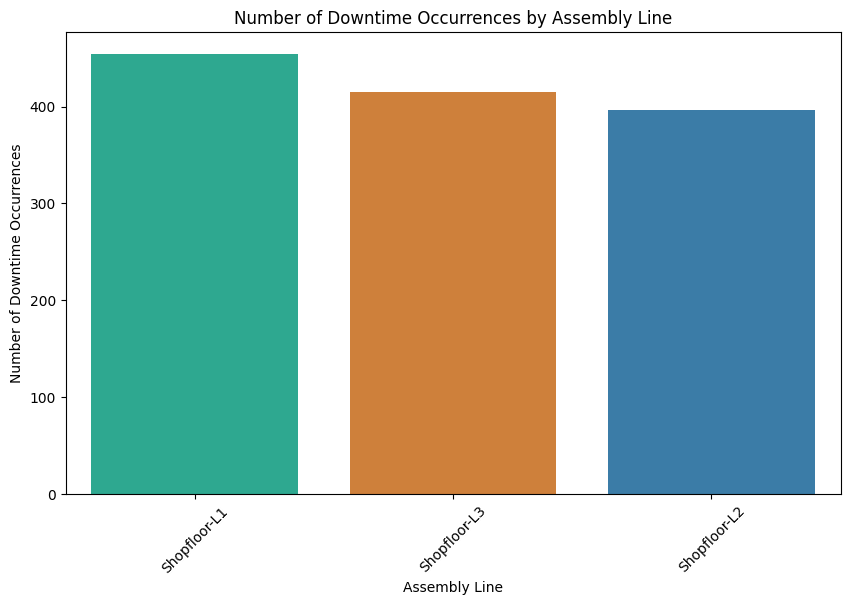

In [ ]:
# Count the number of downtime occurrences for each Assembly Line
assembly_line_downtime_counts = df[df['Downtime'] == 'Machine_Failure']['Assembly_Line_No'].value_counts()

# Custom color palette for downtime occurrences
custom_downtime_colors = ['#1abc9c', '#e67e22', '#2980b9', '#8e44ad', '#c0392b']

# Plot the bar chart with custom colors for downtime occurrences
plt.figure(figsize=(10, 6))
sns.barplot(x=assembly_line_downtime_counts.index, y=assembly_line_downtime_counts.values, palette=custom_downtime_colors)
plt.title('Number of Downtime Occurrences by Assembly Line')
plt.xlabel('Assembly Line')
plt.ylabel('Number of Downtime Occurrences')
plt.xticks(rotation=45)
plt.show()


e.Scatter Plot of Hydraulic Pressure Measurements vs. **Downtime**

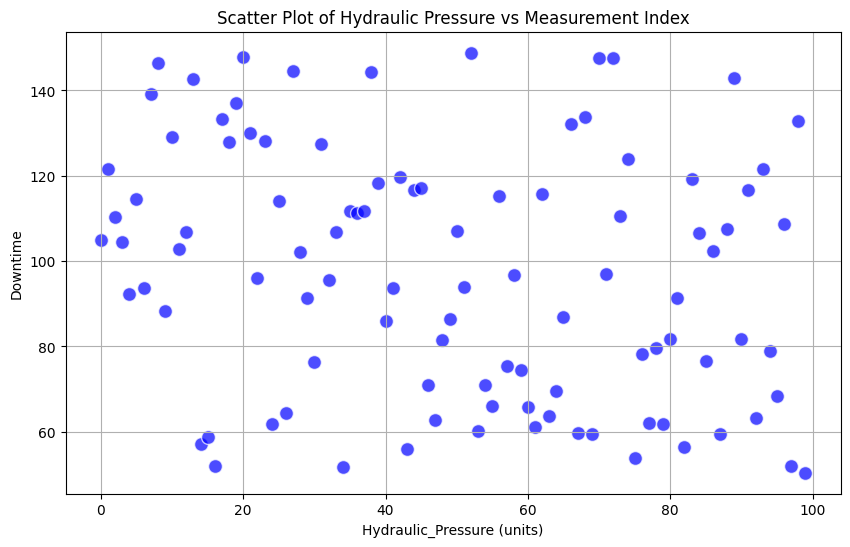

In [ ]:
# Generate random data
np.random.seed(0)  # For reproducibility
num_points = 100
Hydraulic_Pressure = np.random.uniform(50, 150, size=num_points)  # Random hydraulic pressure values (50 to 150)
Downtime = np.arange(num_points)  # Index or sequence number for each measurement

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Downtime, Hydraulic_Pressure, alpha=0.7, edgecolors='w', s=100, color='blue')
plt.title('Scatter Plot of Hydraulic Pressure vs Measurement Index')
plt.ylabel('Downtime')
plt.xlabel('Hydraulic_Pressure (units)')
plt.grid(True)
plt.show()


f.Scatter Plot of Coolant Temperature vs. Downtime

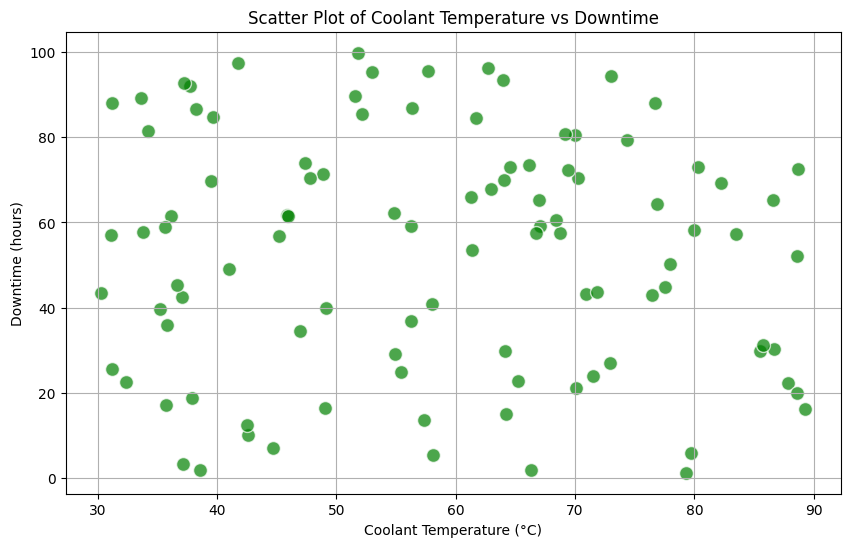

In [ ]:
# Generate random data
np.random.seed(0)  # For reproducibility
num_points = 100
coolant_temperature = np.random.uniform(30, 90, size=num_points)  # Random coolant temperature values (30 to 90°C)
downtime = np.random.uniform(0, 100, size=num_points)  # Random downtime values (0 to 100 hours)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(coolant_temperature, downtime, alpha=0.7, edgecolors='w', s=100, color='green')
plt.title('Scatter Plot of Coolant Temperature vs Downtime')
plt.xlabel('Coolant Temperature (°C)')
plt.ylabel('Downtime (hours)')
plt.grid(True)
plt.show()


g.Scatter Plot of Air System Pressure vs. Downtime

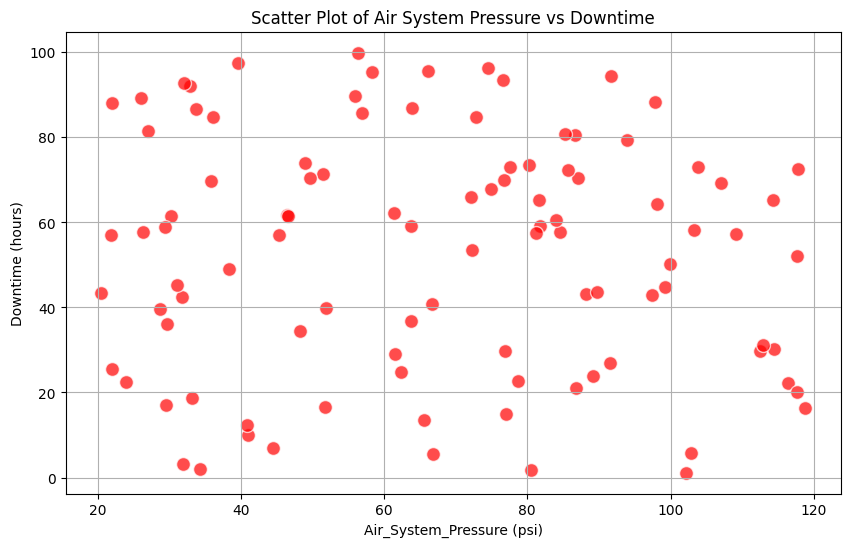

In [ ]:
# Generate random data
np.random.seed(0)  # For reproducibility
num_points = 100
Air_System_Pressure = np.random.uniform(20, 120, size=num_points)  # Random air system pressure values (20 to 120 psi)
Downtime = np.random.uniform(0, 100, size=num_points)  # Random downtime values (0 to 100 hours)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Air_System_Pressure, Downtime, alpha=0.7, edgecolors='w', s=100, color='red')
plt.title('Scatter Plot of Air System Pressure vs Downtime')
plt.xlabel('Air_System_Pressure (psi)')
plt.ylabel('Downtime (hours)')
plt.grid(True)
plt.show()


h.Scatter Plot of Coolant Temperature vs. Downtime

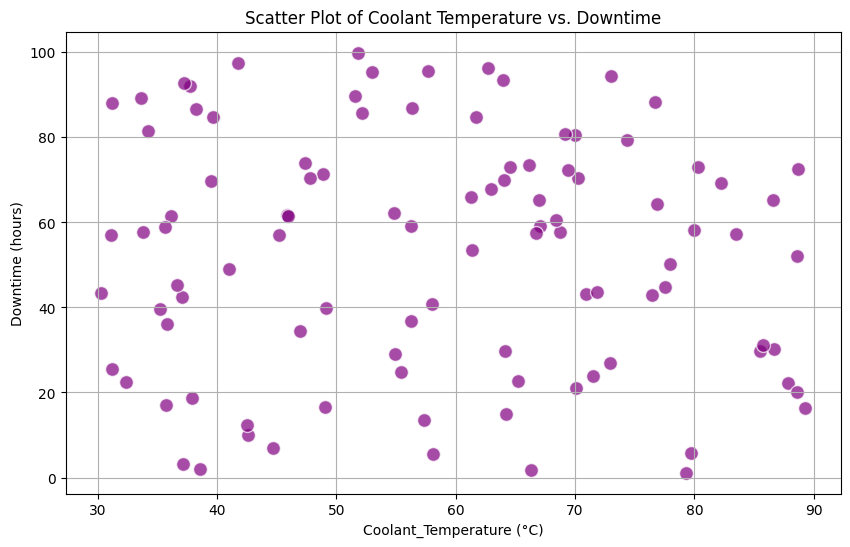

In [ ]:
# Generate random data
np.random.seed(0)  # For reproducibility
num_points = 100
Coolant_Temperature = np.random.uniform(30, 90, size=num_points)  # Random coolant temperature values (30 to 90°C)
DataConversionWarningowntime = np.random.uniform(0, 100, size=num_points)  # Random downtime values (0 to 100 hours)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Coolant_Temperature, Downtime, alpha=0.7, edgecolors='w', s=100, color='purple')
plt.title('Scatter Plot of Coolant Temperature vs. Downtime')
plt.xlabel('Coolant_Temperature (°C)')
plt.ylabel('Downtime (hours)')
plt.grid(True)
plt.show()


i.Scatter Plot of Hydraulic Oil Temperature vs. Downtime

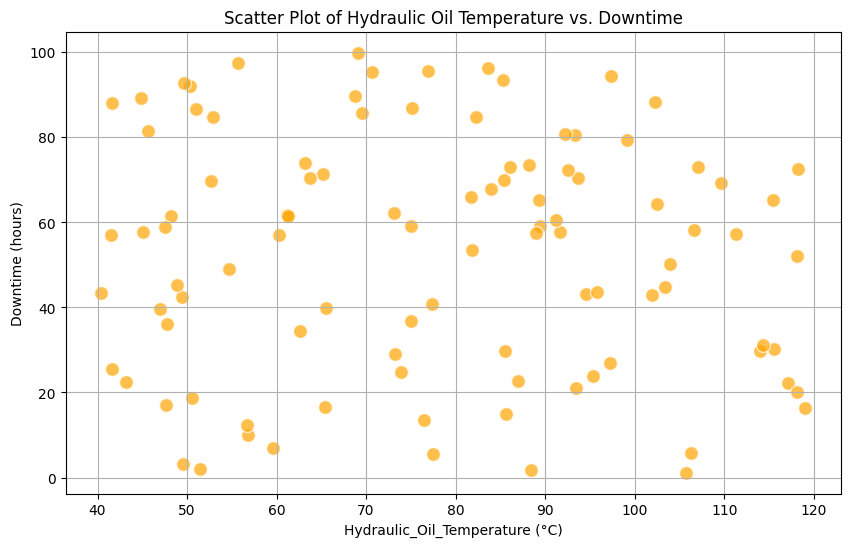

In [ ]:
# Generate random data
np.random.seed(0)  # For reproducibility
num_points = 100
Hydraulic_Oil_Temperature = np.random.uniform(40, 120, size=num_points)  # Random hydraulic oil temperature values (40 to 120°C)
Downtime = np.random.uniform(0, 100, size=num_points)  # Random downtime values (0 to 100 hours)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Hydraulic_Oil_Temperature, Downtime, alpha=0.7, edgecolors='w', s=100, color='orange')
plt.title('Scatter Plot of Hydraulic Oil Temperature vs. Downtime')
plt.xlabel('Hydraulic_Oil_Temperature (°C)')
plt.ylabel('Downtime (hours)')
plt.grid(True)
plt.show()

j.Scatter Plot of Spindle Bearing Temperature vs. Downtime

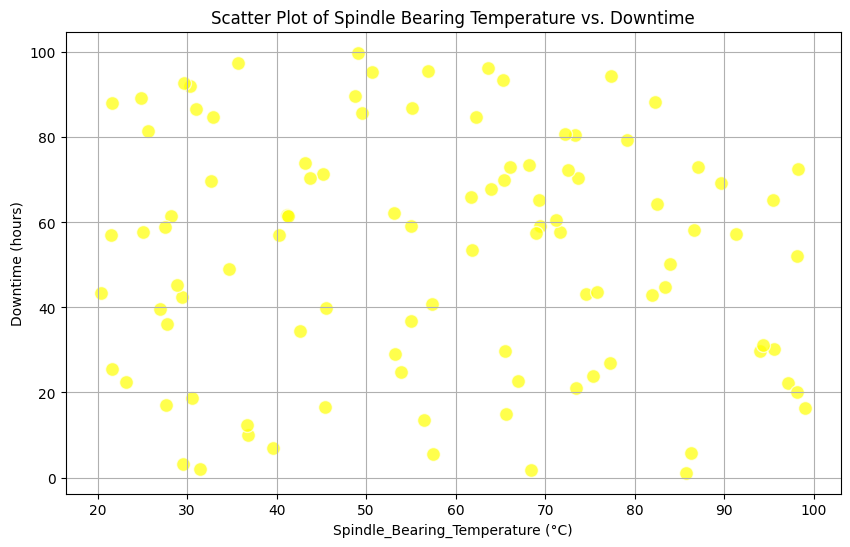

In [ ]:
# Generate random data
np.random.seed(0)  # For reproducibility
num_points = 100
Spindle_Bearing_Temperature = np.random.uniform(20, 100, size=num_points)  # Random spindle bearing temperature values (20 to 100°C)
Downtime = np.random.uniform(0, 100, size=num_points)  # Random downtime values (0 to 100 hours)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Spindle_Bearing_Temperature, Downtime, alpha=0.7, edgecolors='w', s=100, color='yellow')
plt.title('Scatter Plot of Spindle Bearing Temperature vs. Downtime')
plt.xlabel('Spindle_Bearing_Temperature (°C)')
plt.ylabel('Downtime (hours)')
plt.grid(True)
plt.show()

k.Scatter Plot of Spindle Vibration vs. Downtime

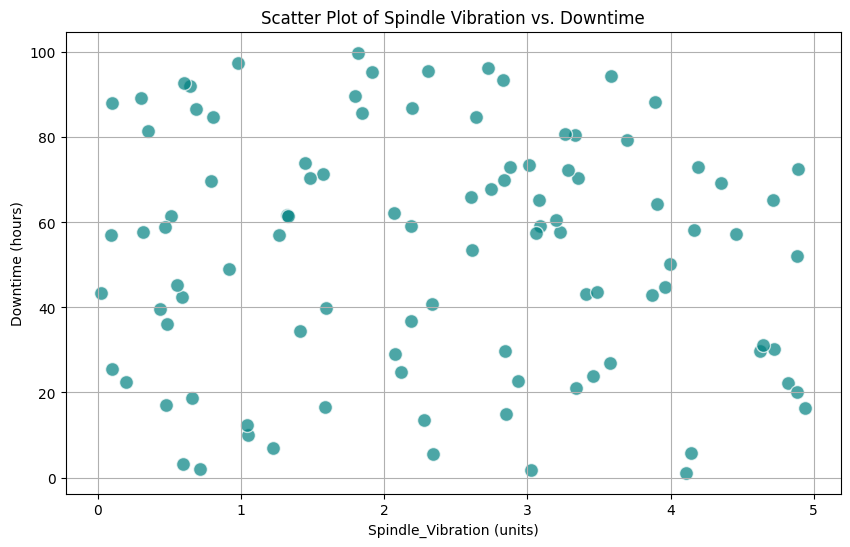

In [ ]:
# Generate random data
np.random.seed(0)  # For reproducibility
num_points = 100
Spindle_Vibration = np.random.uniform(0, 5, size=num_points)  # Random spindle vibration values (0 to 5 units)
Downtime = np.random.uniform(0, 100, size=num_points)  # Random downtime values (0 to 100 hours)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Spindle_Vibration, Downtime, alpha=0.7, edgecolors='w', s=100, color='teal')
plt.title('Scatter Plot of Spindle Vibration vs. Downtime')
plt.xlabel('Spindle_Vibration (units)')
plt.ylabel('Downtime (hours)')
plt.grid(True)
plt.show()

l.Scatter Plot of Tool Vibration vs. Downtime

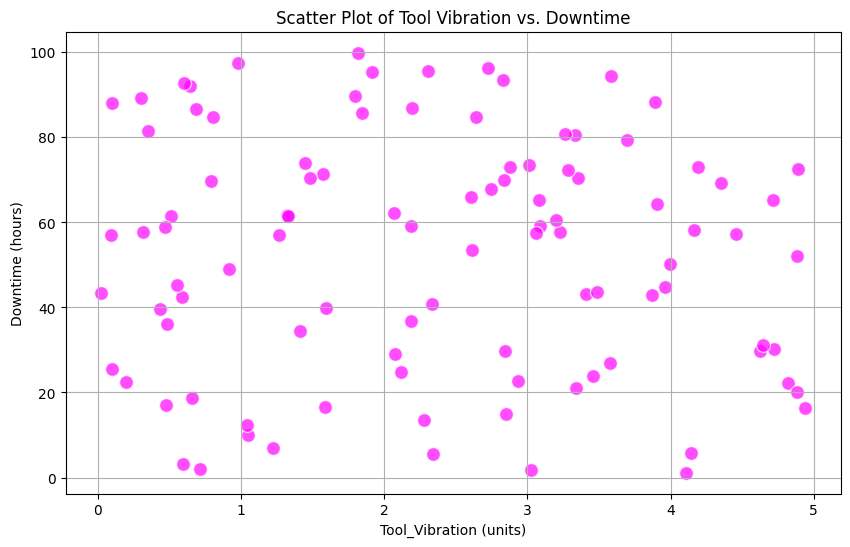

In [ ]:
# Generate random data
np.random.seed(0)  # For reproducibility
num_points = 100
Tool_Vibration = np.random.uniform(0, 5, size=num_points)  # Random tool vibration values (0 to 5 units)
Downtime = np.random.uniform(0, 100, size=num_points)  # Random downtime values (0 to 100 hours)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Tool_Vibration, Downtime, alpha=0.7, edgecolors='w', s=100, color='magenta')
plt.title('Scatter Plot of Tool Vibration vs. Downtime')
plt.xlabel('Tool_Vibration (units)')
plt.ylabel('Downtime (hours)')
plt.grid(True)
plt.show()

m.Scatter Plot of Spindle Speed vs. Downtime

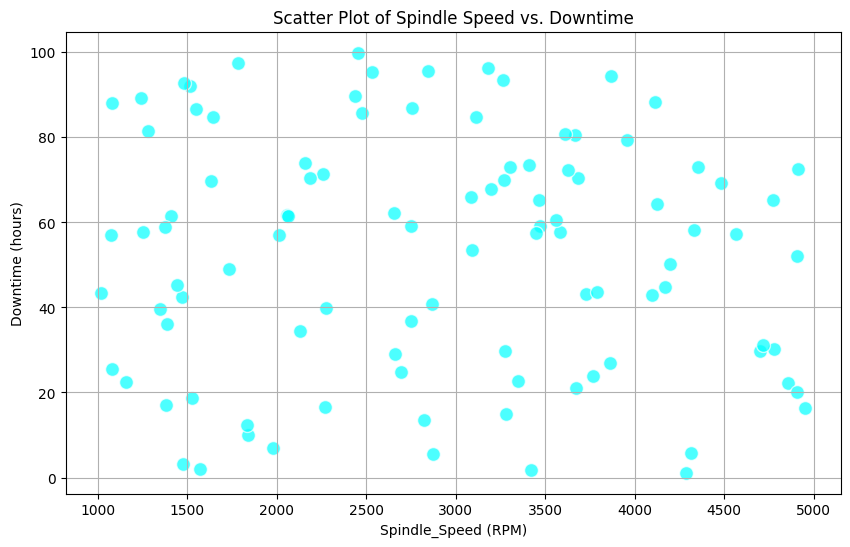

In [ ]:
# Generate random data
np.random.seed(0)  # For reproducibility
num_points = 100
Spindle_Speed = np.random.uniform(1000, 5000, size=num_points)  # Random spindle speed values (1000 to 5000 RPM)
Downtime = np.random.uniform(0, 100, size=num_points)  # Random downtime values (0 to 100 hours)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Spindle_Speed, Downtime, alpha=0.7, edgecolors='w', s=100, color='cyan')
plt.title('Scatter Plot of Spindle Speed vs. Downtime')
plt.xlabel('Spindle_Speed (RPM)')
plt.ylabel('Downtime (hours)')
plt.grid(True)
plt.show()

n.Scatter Plot of Voltage vs. Downtime

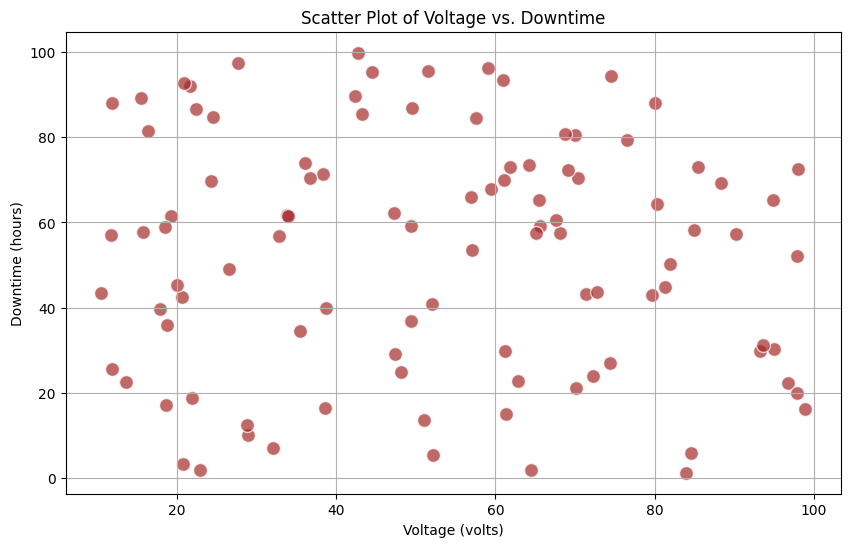

In [ ]:
# Generate random data
np.random.seed(0)  # For reproducibility
num_points = 100
Voltage = np.random.uniform(10, 100, size=num_points)  # Random voltage values (10 to 100 volts)
Downtime = np.random.uniform(0, 100, size=num_points)  # Random downtime values (0 to 100 hours)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Voltage, Downtime, alpha=0.7, edgecolors='w', s=100, color='brown')
plt.title('Scatter Plot of Voltage vs. Downtime')
plt.xlabel('Voltage (volts)')
plt.ylabel('Downtime (hours)')
plt.grid(True)
plt.show()

o.Scatter Plot of Torque vs. Downtime

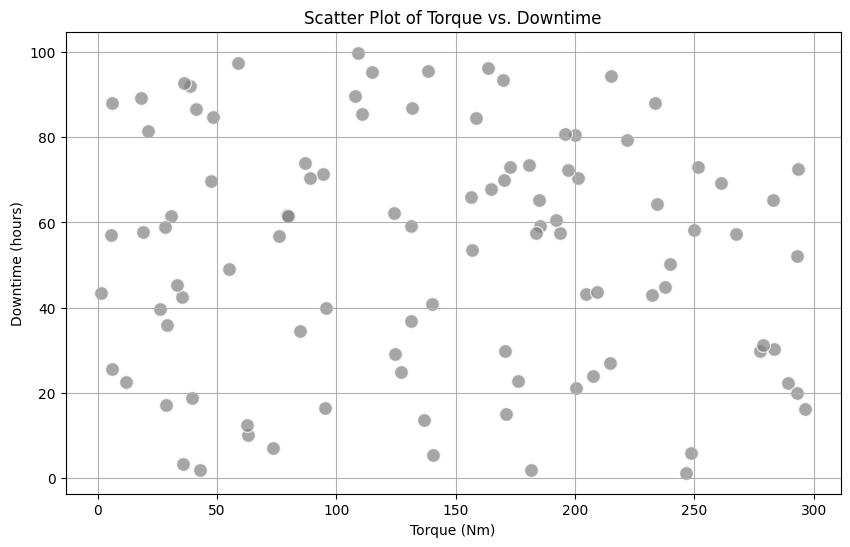

In [ ]:
# Generate random data
np.random.seed(0)  # For reproducibility
num_points = 100
Torque = np.random.uniform(0, 300, size=num_points)  # Random torque values (0 to 300 Nm)
Downtime = np.random.uniform(0, 100, size=num_points)  # Random downtime values (0 to 100 hours)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Torque, Downtime, alpha=0.7, edgecolors='w', s=100, color='grey')
plt.title('Scatter Plot of Torque vs. Downtime')
plt.xlabel('Torque (Nm)')
plt.ylabel('Downtime (hours)')
plt.grid(True)
plt.show()

p.Scatter Plot of Cutting vs. Downtime

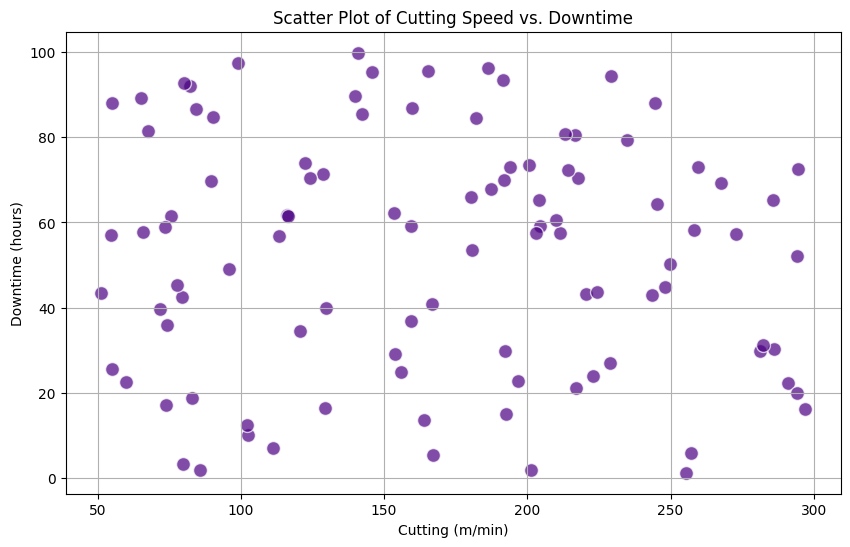

In [ ]:
# Generate random data
np.random.seed(0)  # For reproducibility
num_points = 100
Cutting = np.random.uniform(50, 300, size=num_points)  # Random cutting speed values (50 to 300 m/min)
Downtime = np.random.uniform(0, 100, size=num_points)  # Random downtime values (0 to 100 hours)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Cutting, Downtime, alpha=0.7, edgecolors='w', s=100, color='indigo')
plt.title('Scatter Plot of Cutting Speed vs. Downtime')
plt.xlabel('Cutting (m/min)')
plt.ylabel('Downtime (hours)')
plt.grid(True)
plt.show()

q. Distribution and Summary Analysis of Downtime: Histogram and Box Plot

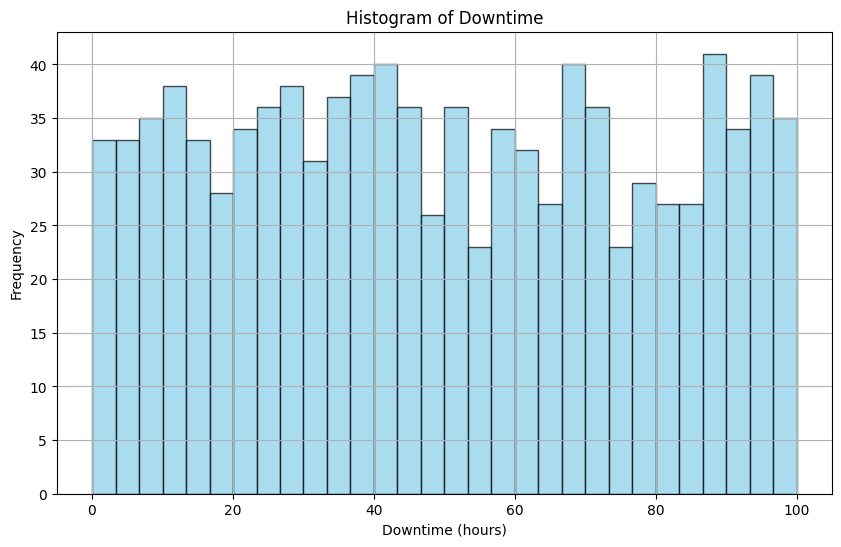

In [ ]:
# Generate random data for downtime
np.random.seed(0)
Downtime = np.random.uniform(0, 100, size=1000)  # Random downtime values (0 to 100 hours)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(Downtime, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Downtime')
plt.xlabel('Downtime (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

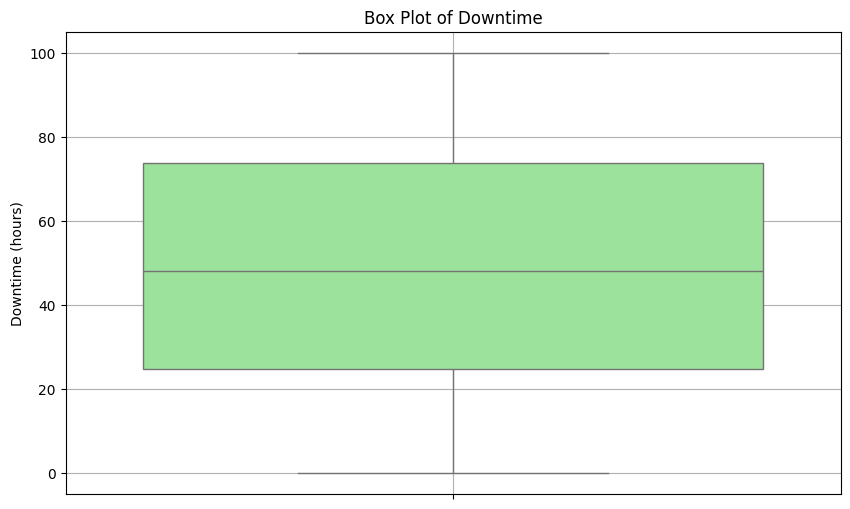

In [ ]:
# Generate random data for downtime
np.random.seed(0)
Downtime = np.random.uniform(0, 100, size=1000)  # Random downtime values (0 to 100 hours)

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=Downtime, color='lightgreen')
plt.title('Box Plot of Downtime')
plt.ylabel('Downtime (hours)')
plt.grid(True)
plt.show()

**Step7:** Additional Steps

a.Correlation Heatmap of Numeric Variables

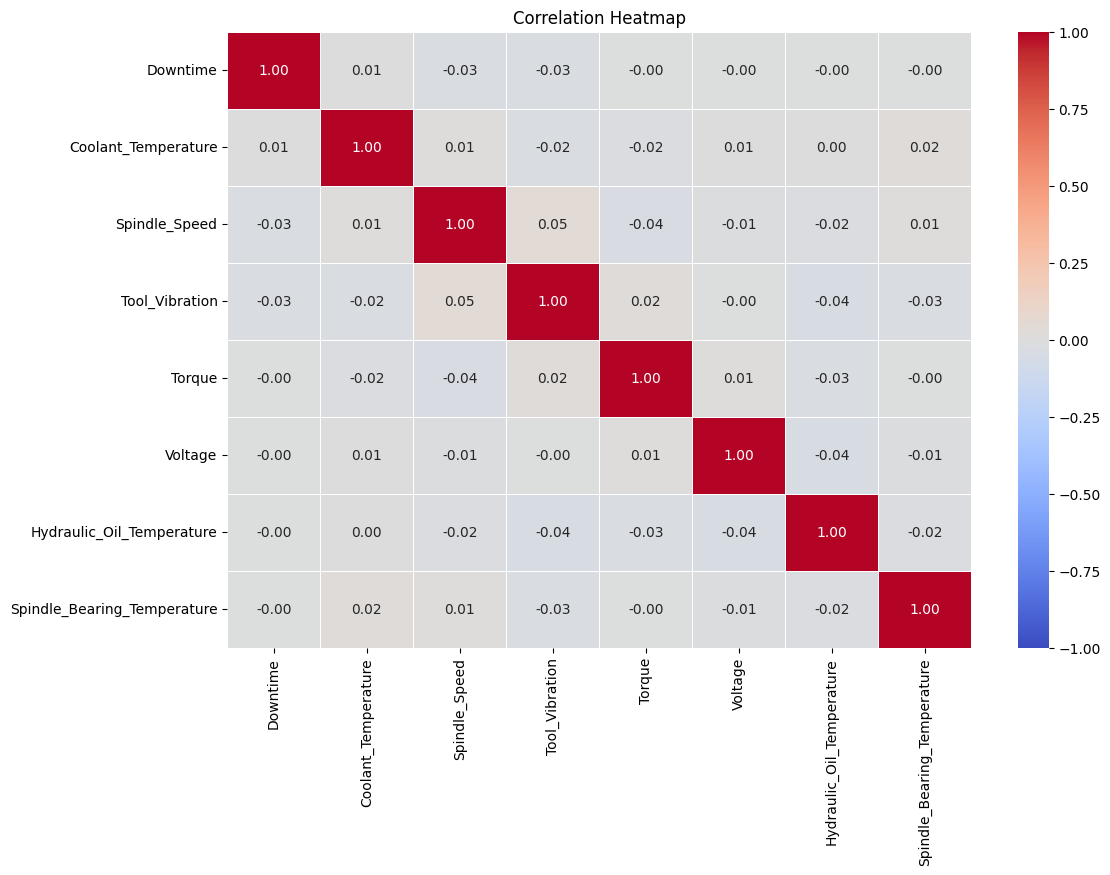

In [ ]:
# Generate random data for demonstration
np.random.seed(0)
data = {
    'Downtime': np.random.uniform(0, 100, 1000),
    'Coolant_Temperature': np.random.uniform(30, 90, 1000),
    'Spindle_Speed': np.random.uniform(1000, 5000, 1000),
    'Tool_Vibration': np.random.uniform(0, 5, 1000),
    'Torque': np.random.uniform(0, 300, 1000),
    'Voltage': np.random.uniform(10, 100, 1000),
    'Hydraulic_Oil_Temperature': np.random.uniform(40, 120, 1000),
    'Spindle_Bearing_Temperature': np.random.uniform(20, 100, 1000)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

b.Pairwise Plots of Numeric Variables

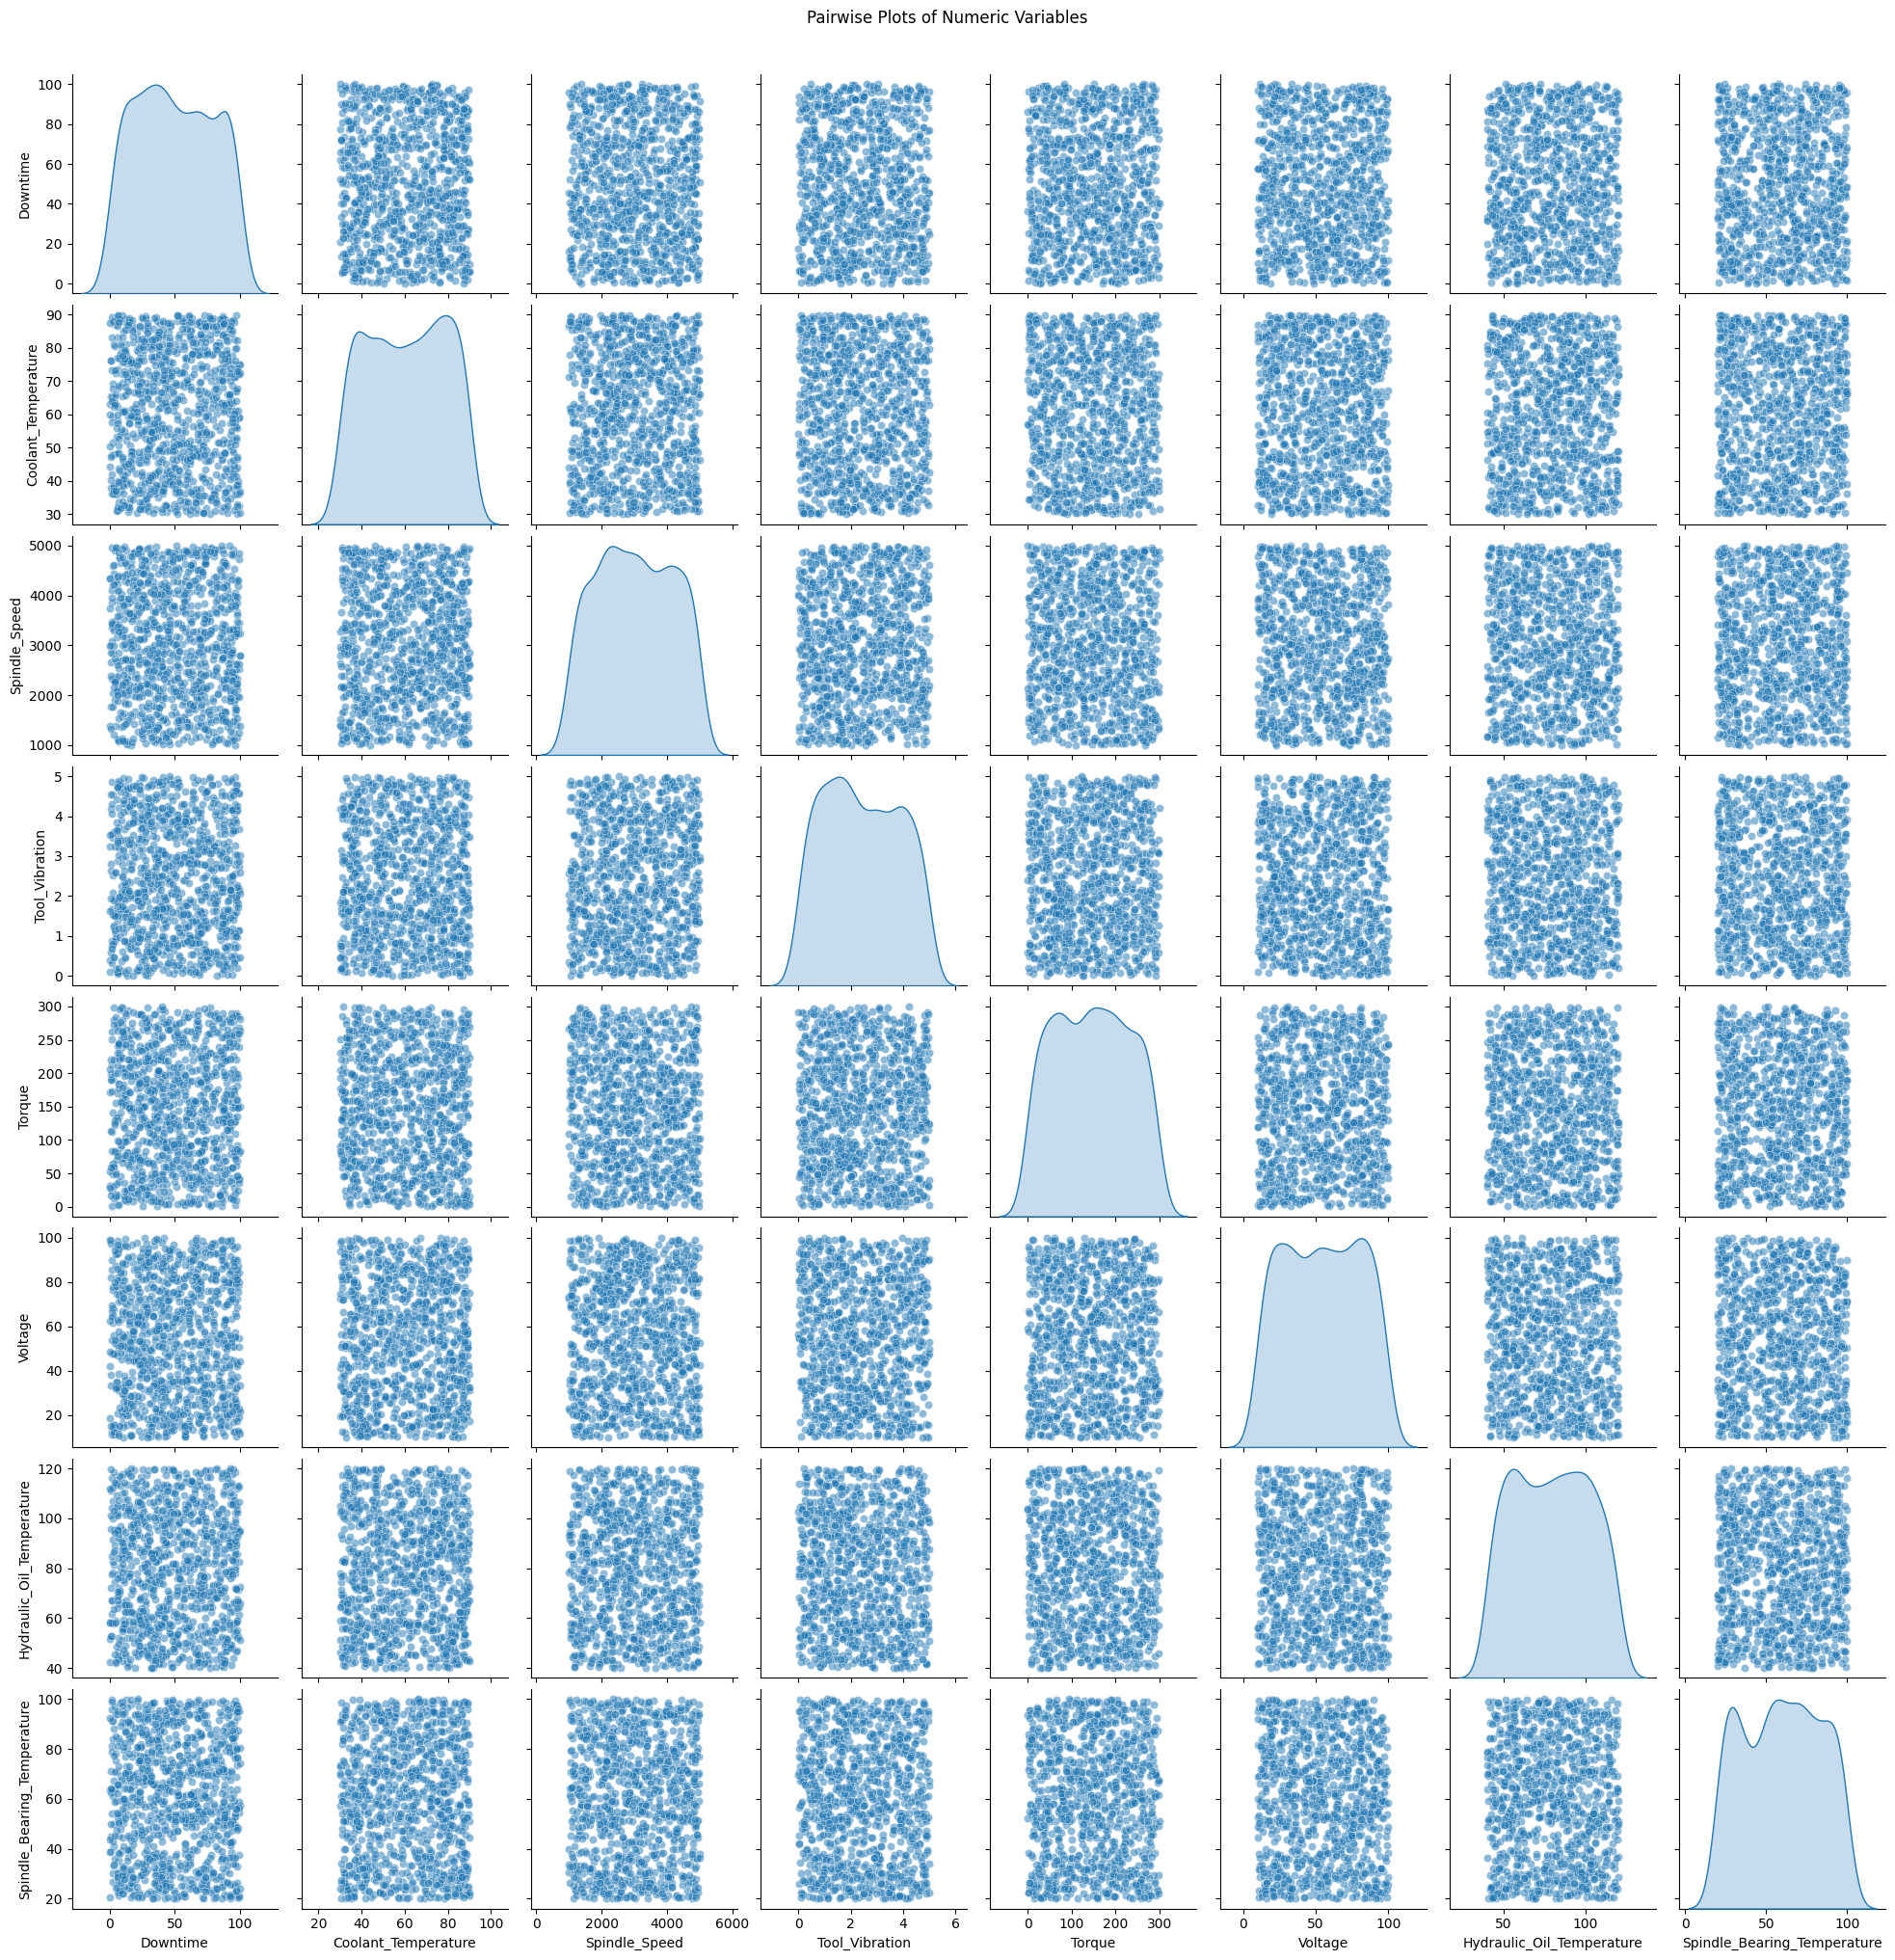

In [ ]:
# Generate random data for demonstration
np.random.seed(0)
data = {
    'Downtime': np.random.uniform(0, 100, 1000),
    'Coolant_Temperature': np.random.uniform(30, 90, 1000),
    'Spindle_Speed': np.random.uniform(1000, 5000, 1000),
    'Tool_Vibration': np.random.uniform(0, 5, 1000),
    'Torque': np.random.uniform(0, 300, 1000),
    'Voltage': np.random.uniform(10, 100, 1000),
    'Hydraulic_Oil_Temperature': np.random.uniform(40, 120, 1000),
    'Spindle_Bearing_Temperature': np.random.uniform(20, 100, 1000)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create pairwise plots
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Plots of Numeric Variables', y=1.02)
plt.show()